In [76]:
#Importing required libraries
import tweepy,warnings
import pandas as pd
import numpy as np
from textblob import TextBlob
from tweepy import Stream
from tweepy.streaming import StreamListener 
from tweepy import OAuthHandler
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.parsing.preprocessing import preprocess_string
import json
import seaborn as sns
import re

In [77]:
#Access tokens
consumer_key = "Gn1r8mXVg4jpBPusrW37664GM"
consumer_secret = "L4rGc5aKsQepup0o2rBsYerWjFgf0vklVYKWf1CJuIbQAHF9W0"
access_token = "270944675-iF5C5ylKXpXKoGjxgvrdSdhrQqeZmOvKA3R18JvD"
access_secret = "EV0pzf9N4hINqhnpQEyM1jeEQu4hP7adhtyQc6zTMcLnS"

In [78]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [79]:
# Creating the API object while passing in auth information
api = tweepy.API(auth)

# The search term you want to find
query = "Trump"
# Language code (follows ISO 639-1 standards)
#language = "en"
#Geocode for location
geo="34.2,-117.4,9mi"   #92407 # Coordinates are accurate 

# Calling the user_timeline function with our parameters
results = api.search(q=query, count = 100, geocode=geo)

# foreach through all tweets pulled
for tweet in results:
   # printing the text stored inside the tweet object
   print(tweet.user.screen_name,"Tweeted:",tweet.text)

mca05 Tweeted: @Handserifed @retrosher @maddow @McFaul And now we all know why Trump hates the media. Cuz We al know what Russia a… https://t.co/ai1h5QTxqn
CarylAnne1963 Tweeted: @RandyRainbow  "You're a foul one Mr. Trump, you're a nasty, filthy lump.

You're treachery is laced with evil and… https://t.co/MJC3VB5h7N
Postalman Tweeted: Maybe it’s not a pee tape. Maybe Trump was having sex with a guy, or guys https://t.co/tC5XIOTBLZ
lostinabss Tweeted: @USARanger63 @TD1TribeKU @realDonaldTrump But never stupid enough to be a trump traitor 😂😂😂😂
lostinabss Tweeted: @realDonaldTrump And the biggest enemy of the American people is Donald Trump #russian puppet #fake president #treason weasel
KareemGongora Tweeted: @poetofscience @laureldavilacpa @DPOC @kdeleon What vital committees? She hasn’t helped us deny Trump nominees or S… https://t.co/Iq05qYNNj4
KareemGongora Tweeted: @AndrewEvans01 @stevemiller999 @CA_Dem @fontanadems She is opposing him but her seniority hasn’t helped one bit in… ht

In [80]:
#Storing in dataframe
data = pd.DataFrame(data=[tweet.text for tweet in results], columns=['Tweets'])
data['Name'] = pd.DataFrame(data=[tweet.user.screen_name for tweet in results], columns=['Names'])

In [81]:
data.head()

,Tweets,Name
0,@Handserifed @retrosher @maddow @McFaul And no...,mca05
1,"@RandyRainbow ""You're a foul one Mr. Trump, y...",CarylAnne1963
2,Maybe it’s not a pee tape. Maybe Trump was hav...,Postalman
3,@USARanger63 @TD1TribeKU @realDonaldTrump But ...,lostinabss
4,@realDonaldTrump And the biggest enemy of the ...,lostinabss


In [82]:
#data.to_excel('C:\\Work\\Voter Project\\Tweets.xlsx')

In [83]:
#Passing a list
data_1 = data['Tweets'].tolist()
print(data_1)

['@Handserifed @retrosher @maddow @McFaul And now we all know why Trump hates the media. Cuz We al know what Russia a… https://t.co/ai1h5QTxqn', '@RandyRainbow  "You\'re a foul one Mr. Trump, you\'re a nasty, filthy lump.\n\nYou\'re treachery is laced with evil and… https://t.co/MJC3VB5h7N', 'Maybe it’s not a pee tape. Maybe Trump was having sex with a guy, or guys https://t.co/tC5XIOTBLZ', '@USARanger63 @TD1TribeKU @realDonaldTrump But never stupid enough to be a trump traitor 😂😂😂😂', '@realDonaldTrump And the biggest enemy of the American people is Donald Trump #russian puppet #fake president #treason weasel', '@poetofscience @laureldavilacpa @DPOC @kdeleon What vital committees? She hasn’t helped us deny Trump nominees or S… https://t.co/Iq05qYNNj4', '@AndrewEvans01 @stevemiller999 @CA_Dem @fontanadems She is opposing him but her seniority hasn’t helped one bit in… https://t.co/y5usYqQkre', 'Even President Trump gets run down, tired etc  with all that he has on his plate....\nAnd, th

In [84]:
#For Sentiment Analysis
def overall_sentiment(data):
    import nltk
    from nltk.sentiment.vader import SentimentIntensityAnalyzer 
    sid = SentimentIntensityAnalyzer()
    neg=0
    pos=0
    neu=0
    comp=0
    Sentiment = []
    for sentence in data:
        print(sentence)
        ss = sid.polarity_scores(sentence)#calculates the sentiment scores
        for k in ss:
            print('{0}: {1}, '.format(k, ss[k]), end='')#prints the scores for each sentence
            #calculating the overall scores
        neg+=ss['neg']
        pos+=ss['pos']
        neu+=ss['neu']
        comp+=ss['compound']
        Sentiment.append(ss['compound'])
        print()
        #print(ss.keys())
    count=len(data)
    print('Overall Sentiment: ')
    print('neg: ',neg/count)
    print('pos: ',pos/count)
    print('neu: ',neu/count)
    print('compound: ',comp/count)
    return Sentiment

In [85]:
results = overall_sentiment(data_1)

@Handserifed @retrosher @maddow @McFaul And now we all know why Trump hates the media. Cuz We al know what Russia a… https://t.co/ai1h5QTxqn
neg: 0.121, neu: 0.879, pos: 0.0, compound: -0.4404, 
@RandyRainbow  "You're a foul one Mr. Trump, you're a nasty, filthy lump.

You're treachery is laced with evil and… https://t.co/MJC3VB5h7N
neg: 0.333, neu: 0.667, pos: 0.0, compound: -0.8402, 
Maybe it’s not a pee tape. Maybe Trump was having sex with a guy, or guys https://t.co/tC5XIOTBLZ
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@USARanger63 @TD1TribeKU @realDonaldTrump But never stupid enough to be a trump traitor 😂😂😂😂
neg: 0.0, neu: 0.798, pos: 0.202, compound: 0.4168, 
@realDonaldTrump And the biggest enemy of the American people is Donald Trump #russian puppet #fake president #treason weasel
neg: 0.171, neu: 0.829, pos: 0.0, compound: -0.5423, 
@poetofscience @laureldavilacpa @DPOC @kdeleon What vital committees? She hasn’t helped us deny Trump nominees or S… https://t.co/Iq05qYNNj4


In [86]:
results

[-0.4404,
 -0.8402,
 0.0,
 0.4168,
 -0.5423,
 -0.0516,
 0.0,
 -0.7269,
 0.0,
 0.6322,
 0.0,
 0.34,
 0.0,
 -0.3595,
 0.0,
 0.1189,
 0.4404,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5106,
 0.1779,
 0.7156,
 0.0,
 -0.5754,
 0.3612,
 0.3612,
 0.3612,
 -0.7793,
 0.3738,
 -0.4215,
 -0.6808,
 0.4389,
 0.0,
 0.0,
 0.0,
 0.128,
 -0.2263,
 0.4576,
 -0.5267,
 0.0,
 -0.6705,
 0.5859,
 0.0,
 0.1531,
 -0.7003,
 0.7162,
 -0.0772,
 -0.347,
 -0.0343,
 -0.347,
 0.0,
 -0.5719,
 0.5859,
 0.5859,
 0.566,
 0.743,
 -0.5719,
 0.1531,
 -0.4767,
 -0.1027,
 0.0,
 0.5574,
 0.0,
 0.7579,
 -0.872,
 0.1531,
 0.1531,
 -0.296,
 0.0,
 0.3182,
 -0.5106,
 -0.9271,
 0.3182,
 0.0258,
 0.5562,
 -0.5837,
 0.7351,
 -0.2427,
 -0.5849,
 -0.6983,
 -0.4215,
 -0.2942,
 0.0,
 0.4939,
 0.0,
 0.5423,
 0.6597,
 0.0,
 0.6908,
 -0.3875,
 0.0,
 0.743,
 0.4201,
 0.743,
 -0.4588]

In [87]:
Sentiment = pd.DataFrame({'Sentiment Value': results})
results_data = pd.concat([data, Sentiment], axis=1)
results_data

,Tweets,Name,Sentiment Value
0,@Handserifed @retrosher @maddow @McFaul And no...,mca05,-0.4404
1,"@RandyRainbow ""You're a foul one Mr. Trump, y...",CarylAnne1963,-0.8402
2,Maybe it’s not a pee tape. Maybe Trump was hav...,Postalman,0.0000
3,@USARanger63 @TD1TribeKU @realDonaldTrump But ...,lostinabss,0.4168
4,@realDonaldTrump And the biggest enemy of the ...,lostinabss,-0.5423
5,@poetofscience @laureldavilacpa @DPOC @kdeleon...,KareemGongora,-0.0516
6,@AndrewEvans01 @stevemiller999 @CA_Dem @fontan...,KareemGongora,0.0000
7,"Even President Trump gets run down, tired etc ...",tmac1222,-0.7269
8,RT @sbsun: Opinion: Trump blows hot air in Hel...,PhilDeCarolis,0.0000
9,@maddow what military agreement did Trump ente...,CarylAnne1963,0.6322


In [88]:
results_data.loc[results_data['Sentiment Value'] < -0.5 , 'Sentiment'] = "Very Negative"
results_data.loc[(results_data['Sentiment Value'] >= -0.5) & (results_data['Sentiment Value'] < 0.00), 'Sentiment'] = "Negative"
results_data.loc[(results_data['Sentiment Value'] == 0.00) , 'Sentiment'] = "Neutral"
results_data.loc[(results_data['Sentiment Value'] > 0.00) & (results_data['Sentiment Value'] < 0.5) , 'Sentiment'] = "Positive"
results_data.loc[(results_data['Sentiment Value'] >= 0.5) , 'Sentiment'] = "Very Positive"

In [89]:
results_data

,Tweets,Name,Sentiment Value,Sentiment
0,@Handserifed @retrosher @maddow @McFaul And no...,mca05,-0.4404,Negative
1,"@RandyRainbow ""You're a foul one Mr. Trump, y...",CarylAnne1963,-0.8402,Very Negative
2,Maybe it’s not a pee tape. Maybe Trump was hav...,Postalman,0.0000,Neutral
3,@USARanger63 @TD1TribeKU @realDonaldTrump But ...,lostinabss,0.4168,Positive
4,@realDonaldTrump And the biggest enemy of the ...,lostinabss,-0.5423,Very Negative
5,@poetofscience @laureldavilacpa @DPOC @kdeleon...,KareemGongora,-0.0516,Negative
6,@AndrewEvans01 @stevemiller999 @CA_Dem @fontan...,KareemGongora,0.0000,Neutral
7,"Even President Trump gets run down, tired etc ...",tmac1222,-0.7269,Very Negative
8,RT @sbsun: Opinion: Trump blows hot air in Hel...,PhilDeCarolis,0.0000,Neutral
9,@maddow what military agreement did Trump ente...,CarylAnne1963,0.6322,Very Positive


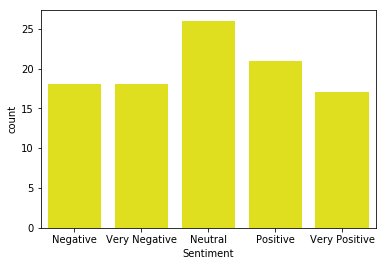

In [90]:
sns.countplot( results_data["Sentiment"], color = 'yellow')

### Percentage of each Sentiment

In [91]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [92]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,Name,SA
0,@Handserifed @retrosher @maddow @McFaul And no...,mca05,0
1,"@RandyRainbow ""You're a foul one Mr. Trump, y...",CarylAnne1963,-1
2,Maybe it’s not a pee tape. Maybe Trump was hav...,Postalman,0
3,@USARanger63 @TD1TribeKU @realDonaldTrump But ...,lostinabss,1
4,@realDonaldTrump And the biggest enemy of the ...,lostinabss,-1
5,@poetofscience @laureldavilacpa @DPOC @kdeleon...,KareemGongora,1
6,@AndrewEvans01 @stevemiller999 @CA_Dem @fontan...,KareemGongora,0
7,"Even President Trump gets run down, tired etc ...",tmac1222,-1
8,RT @sbsun: Opinion: Trump blows hot air in Hel...,PhilDeCarolis,1
9,@maddow what military agreement did Trump ente...,CarylAnne1963,-1


In [93]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]


In [94]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 33.0%
Percentage of neutral tweets: 38.0%
Percentage de negative tweets: 29.0%


In [96]:
##Append two more columns denoting list of topic words and their respective probabilities
def preprocess_and_runLDA(data):
    preprocsplit = (lambda rev: np.asarray(preprocess_string(rev)))
    text_rev = data['Tweets'].apply(preprocsplit).values
    c_dict = Dictionary(text_rev)
    c_corpus = [c_dict.doc2bow(text) for text in text_rev]
    lda = LdaModel(c_corpus)
    topics = [lda.get_document_topics(doc)[0] for doc in c_corpus]
    topIDs,probIDs = list(zip(*topics))
    tops_and_probs = [lda.show_topic(topID) for topID in topIDs]
    tops_and_probs = [list(zip(*t_and_p)) for t_and_p in tops_and_probs]
    tops,probs = [list(top[0]) for top in tops_and_probs],[list(prob[1]) for prob in tops_and_probs]
    words = list(map(lambda word_list: list(map(lambda word: dict(c_dict)[int(word)], word_list)), tops))
    data['top_words'] = pd.Series(words)
    data['top_probs'] = pd.Series(probs)
    return data
    
LDAdata = preprocess_and_runLDA(data)


0     [trump, http, know, davidhogg, mdmbqrqhm, spea...
1     [trump, http, putin, want, didn’t, summit, mhd...
2     [trump, http, mayb, gui, putin, shame, eart…, ...
3     [trump, http, she’, like, appear, get, don’t, ...
4     [fake, weasel, biggest, donald, enemi, america...
5     [trump, http, help, nomine, iqqynnj, vital, po...
6     [http, trump, mayor, despit, win, hasn’t, nomi...
7     [trump, report, tire, run, plate, get, meabuqh...
8     [http, trump, putin, hope, consp…, szhumcfghi,...
9     [russia, maddow, agreement, enter, meet, milit...
10    [http, opinion, trump, helsinki, blow, cartoon...
11    [realdonaldtrump, http, democrat, judgejeanin,...
12    [http, trump, putin, ago, vwapwjiu, ask, prote...
13    [russia, stormi, trump, correct, narscist, que...
14    [trump, http, know, davidhogg, mdmbqrqhm, spea...
15    [http, trump, que, acepta, la, interfirió, pre...
16    [support, oliv, garden, trump, busi, youtub, f...
17    [http, trump, putin, journalist, pfzzwquz,

In [97]:
LDAdata.to_csv('twitter_data_with_LDA.csv')